<font color='seagreen'>

# Week 8 -- Diurnal and Seasonal Variability

*Please finish and submit this project before the start of class on 25 October 2017.*

Here, we'll stop treating planets as globally homogenous and constant in time. We'll explore the response to time-variable forcing, and calculate the changing flux experienced due to diurnal and seasonal variability.

<font color='seagreen'> 
### Q1: Thermal Inertia

Consider a planet covered mostly with a liquid water ocean ($c_{\rm p} = 4128~J~K^{-1}~kg^{-1}$, $\rho = 1000~kg~m^{-3}$). Suppose that the atmosphere for some reason has no effect whatsoever on the surface energy budget. (Briefly describe, why would this situation be hard to arrange, even for a pure $N_2$ atmosphere?) Therefore, the bolometric outgoing longwave radiation is given by $F(T) = \sigma_{\rm SB} T^4$. Suppose that the temperature of the polar ocean is $300~K$ when the Sun sets and the long polar winter begins. How long would it take for the ocean to fall to the freezing point (about $271~K$ for salt water), assuming the top $50~m$ of the ocean are well-mixed (and therefore isothermal). 


<font color='seagreen'>
### Q2: Hot and Cold

It can be helpful to think about diurnal/seasonal forcing of a planet's atmosphere by first looking at some real data from a world that has no atmosphere. This quick example is also to help you think about the importance of the solar zenith angle, before diving into the full season calculation in Q3.

+ Calculate and plot the surface temperature on the Moon, as a function of the solar zenith angle $\theta_z$. For this problem, you can assume the Bond albedo of the lunar surface is constant everywhere at $A_{\rm B} = 0.1$, that the solar constant is $1360~W/m^2$, and that the surface is in instantaneous radiative equilibrium. Include angles of at least $-\pi < \theta_z < \pi$ on your plot.

+ By eye, compare your simulation to the models and measurements from the Lunar Reconnaissance Orbiter DIVINER experiment, as shown on their [website](https://www.diviner.ucla.edu/science). Qualitatively discuss the similarities and differences, and the physical cause of those differences. (Note that the Moon's effective obliquity is about $1.5^\circ$, small enough to be ignored.)

<font color='seagreen'>
### Q3: Seasons

Let's play with seasons by creating imaginary planets that receive the same average insolation as Earth ($S_0 = 1360~W/m^2$) but have different obliquities. We will create plots that help us visualize the total heating experienced by a particular patch of the planet's surface, on both diurnal and seasonal timescales. 

+ Based on the expression derived in class, write code to make a heat-map plot (for example, with `plt.imshow`) showing the instantaneous flux received by any patch of the planet's surface (in $[W/m^2]$), with hour angle $h$ on the horizontal axis and latitude $\phi$ on the vertical. Loop over 7 values for the solar declination $\delta$, evenly spaced over $-90^\circ < \delta < 90^\circ$, and plot one heat-map for each $\delta$. Include a colorbar to indicate the quantitative values associated with each color.

+ Plot the instantaneous flux recieved at local noon (when the Sun is at its highest in the sky), as a function of latitude $\phi$. Make one curve for each of the 7 solar declinations used above. 

+ Let's define $h_{\rm t}$ to be the hour angle of the day-night terminator (where $\cos \theta_z = 0$), where the Sun sets as seen from the planet. If the Sun actually rises and sets at a given latitude, $h_{\rm t}$ can directly calculated. If the Sun never sets, we should adopt $h_{\rm t} = \pi$. If the Sun never rises, we should adopt $h_{\rm t} = 0$. Plot the hour angle of sunset as a function of latitude $\phi$, making one curve for each $\delta$.

+ For each $\delta$, plot the daily averaged flux each latitude receives, as a function of latitude $\phi$. You can calculate this daily average as
$$\left<S(\phi, \delta)\right> = \frac{1}{2\pi}\int^{h_{\rm t}}_{-h_{\rm t}} S_0 \cos \theta_z(h) dh $$
performing the integral either analytically or numerically. 

+ Briefly discuss the implications of these last three plots (flux at local noon, hour angle of sunset, daily averaged flux) for seasonal heating on Earth or other planets. (What is the maximum $\delta$ ever seen on Earth?)

+ Now, let's introduce seasonal variations, where $\delta$ changes throughout an orbit, due to the changing angle between the planet's spin and the direction toward the Sun. The solar declination $\delta$ obeys
$$\sin \delta = \sin \gamma \cos \kappa (t) $$
where $\gamma$ is the obliquity of the planet (the angle between its spin axis and its orbit normal) and $\kappa$ is the "season angle". In analogy to the hour angle, the season angle represents the angular position of the planet in its orbit, measured relative to time of the northern summer solstice. Assuming a perfectly circular orbit, we can write
$$\kappa(t) = \frac{2\pi t}{P_{\rm orb}}$$
where $t$ is the time, and $P_{\rm orb}$ is the orbital period. $\kappa(t)$ would be a more complicated function for an eccentric orbit. For an Earth-like obliquity ($\gamma = 23.5^\circ$), make a heat-map plot showing the daily averaged flux hitting each latitude $\phi$  (vertical axis) as a function of time $t$ (horizontal axis) throughout the year. Overplot the declination of the Sun (which is a latitude) as a function of time. At the northern summer solstice, what latitude receives the most (daily-averaged) flux?

+ Make similar daily-averaged flux maps for obliquities spanning $0^\circ < \gamma < 90^\circ$, as well as plots of the *seasonally* averaged flux received by each latitude. Above approximately what obliquity does the equator receive less seasonally average flux than the poles?

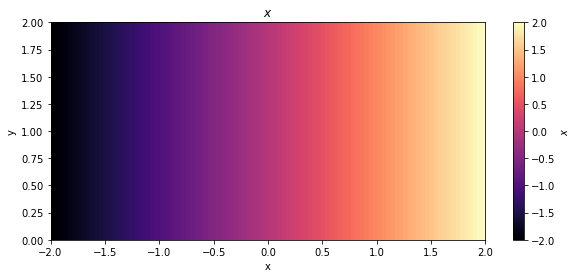

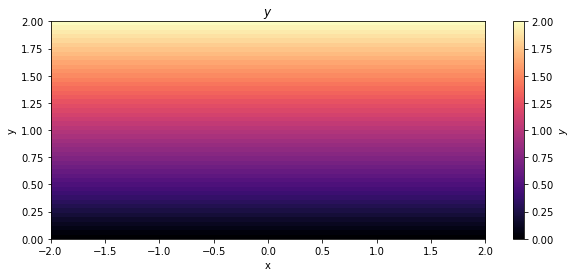

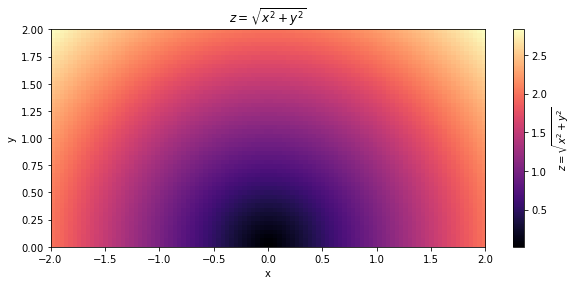

In [1]:
# the following snippets handy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create some 1D arrays
x1d = np.linspace(-2, 2, 100)
y1d = np.linspace(0, 2, 50)

# create 2D arrays of x and y
x2d, y2d = np.meshgrid(x1d, y1d)

# do a calculation with those x + y
z2d = np.sqrt((x2d**2 + y2d**2))

def zachs_imshow(array, title):
    '''
    This function is a help to demonstrate how
    imshow-ing arrays works in matplotlib.
    '''
    
    # create a new figure
    plt.figure(figsize=(10,4))
    
    # make an image, with brightness representing array values
    plt.imshow(array, 
               cmap='magma', # Choose the color map.
               origin='lower', # Set (x,y) = (0,0) to be the lower left.
               extent=[np.min(x1d), # Extent sets the coordinates for the corners
                       np.max(x1d), #  of the array you're plotting
                       np.min(y1d), #  [left, right, bottom, top]
                       np.max(y1d)],
               aspect='equal', # How is the aspect ratio of the plot set?
               interpolation='nearest') # How are points visually interpolated?
    
    # add a colorbar indicating the scale of the colors
    plt.colorbar(label=title)

    # normal stuff
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

# show the values in each of the three arrays
zachs_imshow(x2d, '$x$')
zachs_imshow(y2d, '$y$')
zachs_imshow(z2d, '$z = \sqrt{x^2 + y^2}$')

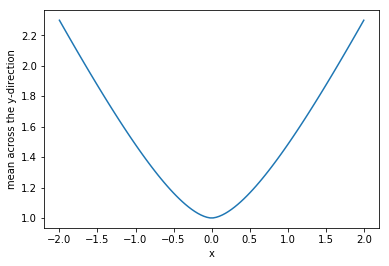

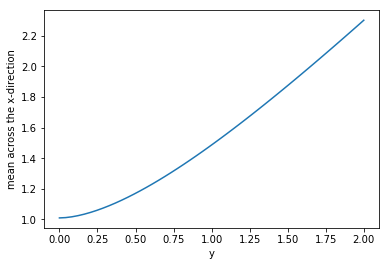

In [2]:
# numpy makes it easy to average an array along an axis
plt.figure()
plt.plot(x1d, np.mean(z2d, axis=0))
plt.xlabel('x')
plt.ylabel('mean across the y-direction')

plt.figure()
plt.plot(y1d, np.mean(z2d, axis=1))
plt.xlabel('y')
plt.ylabel('mean across the x-direction')